In [48]:
# import the necessary libraries
# - pandas, matplotlib, and seaborn as usual
# - numpy, for functions that return arrays instead of data frames
# - the KMeans object from scikit
# - the StandardScaler object from scikit, for scaling of values if required
# - the silhouette_score function from scikit, to determine a value of 'K'
# - the interact function from ipywidgets, to create interactive widgets
# - the Dropdown widget from ipywidgets, to create dropdown menus
import pandas as pd
import numpy as np
import voila as vl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from ipywidgets import interact, Dropdown
from IPython.display import display


In [49]:
#Load the dataset
df = pd.read_csv('./pokemon.csv')

# Process the Type column to extract primary type (Type 1)
# Since types can be multi-line, we'll split by newline and take the first type
df['Type_1'] = df['Type'].apply(lambda x: str(x).split('\n')[0].strip() if pd.notna(x) else 'Unknown')
df['Type_2'] = df['Type'].apply(lambda x: str(x).split('\n')[1].strip() if pd.notna(x) and '\n' in str(x) else None)

# Get unique primary types
unique_types = sorted(df['Type_1'].unique())

In [50]:
# Define Pokedex-themed color palette
def get_pokedex_colors(n):
    """
    Create a Pokedex-themed gradient from red to blue
    """
    from matplotlib.colors import LinearSegmentedColormap
    # Pokedex red (#EF5350) to blue (#42A5F5)
    colors_list = ['#EF5350', '#EC407A', '#AB47BC', '#7E57C2', '#5C6BC0', '#42A5F5']
    cmap = LinearSegmentedColormap.from_list('pokedex', colors_list)
    return [cmap(i/n) for i in range(n)]

# The Poke-Dat

## Top 10 Most Powerful Pokemon by Type

In [51]:
# Create the interactive visualization function
def visualize_top_pokemon(pokemon_type='BUG'):
    """
    Display top 10 most powerful Pokemon of a given type based on Total stats
    """
    # Filter by selected type
    filtered_df = df[df['Type_1'] == pokemon_type].copy()
    
    if len(filtered_df) == 0:
        print(f"No Pokemon found for type: {pokemon_type}")
        return
    
    # Sort by Total stats and get top 10
    top_10 = filtered_df.nlargest(10, 'Total').copy()
    
    # Create the visualization
    plt.figure(figsize=(12, 8))
    
    # Use Pokedex-themed colors
    colors = get_pokedex_colors(len(top_10))
    
    # Create horizontal bar chart
    bars = plt.barh(range(len(top_10)), top_10['Total'], color=colors)
    
    # Customize the plot
    plt.yticks(range(len(top_10)), top_10['Name'].str.replace('\n', ' '))
    plt.xlabel('Total Stats', fontsize=12, fontweight='bold')
    plt.ylabel('Pokemon', fontsize=12, fontweight='bold')
    plt.title(f'Top 10 Most Powerful {pokemon_type.title()} Type Pokemon', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(top_10.iterrows()):
        plt.text(row['Total'] + 5, i, f"{int(row['Total'])}", 
                va='center', fontsize=10, fontweight='bold')
    
    # Invert y-axis so highest is on top
    plt.gca().invert_yaxis()
    
    # Add grid for better readability
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Create interactive dropdown widget
type_dropdown = Dropdown(
    options=unique_types,
    value='BUG',
    description='Type 1:',
    disabled=False,
    style={'description_width': 'initial'}
)

# Display the interactive visualization
interact(visualize_top_pokemon, pokemon_type=type_dropdown);

interactive(children=(Dropdown(description='Type 1:', options=('BUG', 'DARK', 'DRAGON', 'ELECTRIC', 'FAIRY', '…

## Top 10 Pokemon by Specific Stat

In [52]:
# Create visualization for specific stats
def visualize_top_pokemon_by_stat(stat='Attack'):
    """
    Display top 10 Pokemon based on a specific stat (Total, HP, Attack, Defense, etc.)
    """
    # Sort by selected stat and get top 10
    top_10 = df.nlargest(10, stat).copy()
    
    # Create the visualization
    plt.figure(figsize=(12, 8))
    
    # Use Pokedex-themed colors
    colors = get_pokedex_colors(len(top_10))
    
    # Create horizontal bar chart
    bars = plt.barh(range(len(top_10)), top_10[stat], color=colors)
    
    # Customize the plot
    plt.yticks(range(len(top_10)), top_10['Name'].str.replace('\n', ' '))
    plt.xlabel(f'{stat} Stat Value', fontsize=12, fontweight='bold')
    plt.ylabel('Pokemon', fontsize=12, fontweight='bold')
    plt.title(f'Top 10 Pokemon by {stat}', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(top_10.iterrows()):
        plt.text(row[stat] + (row[stat] * 0.01), i, f"{int(row[stat])}", 
                va='center', fontsize=10, fontweight='bold')
    
    # Invert y-axis so highest is on top
    plt.gca().invert_yaxis()
    
    # Add grid for better readability
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Create interactive dropdown for stat selection
stat_dropdown = Dropdown(
    options=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
    value='Attack',
    description='Stat:',
    disabled=False,
    style={'description_width': 'initial'}
)

# Display the interactive stat visualization
interact(visualize_top_pokemon_by_stat, stat=stat_dropdown);

interactive(children=(Dropdown(description='Stat:', index=2, options=('Total', 'HP', 'Attack', 'Defense', 'Sp.…

## Pokemon Type Distribution

In [53]:
# Interactive type distribution visualization
def show_type_distribution(type_selection='Primary Type (Type 1)'):
    """
    Display distribution of Pokemon by selected type (Primary or Secondary)
    """
    plt.figure(figsize=(14, 6))
    
    # Select the appropriate type column based on dropdown selection
    if type_selection == 'Primary Type (Type 1)':
        type_counts = df['Type_1'].value_counts().sort_values(ascending=False)
        title = 'Distribution of Pokemon by Primary Type'
    else:  # Secondary Type (Type 2)
        # Filter out None values for secondary type
        type_counts = df['Type_2'].value_counts().sort_values(ascending=False)
        title = 'Distribution of Pokemon by Secondary Type'
    
    # Use Pokedex-themed colors
    colors = get_pokedex_colors(len(type_counts))
    bars = plt.bar(range(len(type_counts)), type_counts.values, color=colors)
    
    plt.xticks(range(len(type_counts)), type_counts.index, rotation=45, ha='right')
    plt.xlabel('Pokemon Type', fontsize=12, fontweight='bold')
    plt.ylabel('Count of Pokemon', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    
    # Add value labels
    for i, v in enumerate(type_counts.values):
        plt.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

# Create interactive dropdown for type distribution
type_dist_dropdown = Dropdown(
    options=['Primary Type (Type 1)', 'Secondary Type (Type 2)'],
    value='Primary Type (Type 1)',
    description='Type:',
    disabled=False,
    style={'description_width': 'initial'}
)

# Display the interactive type distribution
interact(show_type_distribution, type_selection=type_dist_dropdown);

interactive(children=(Dropdown(description='Type:', options=('Primary Type (Type 1)', 'Secondary Type (Type 2)…

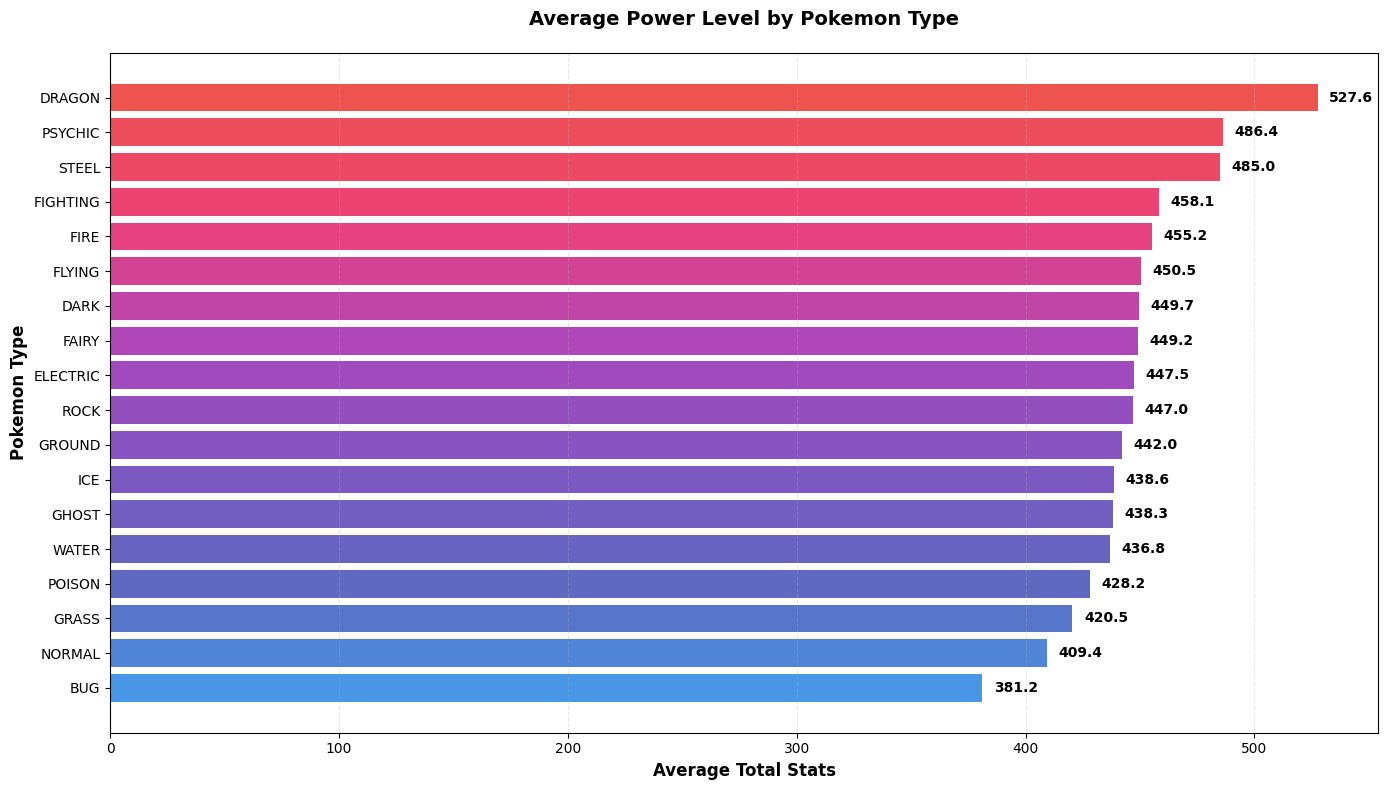

In [54]:
# Compare stats across types
def compare_type_stats():
    plt.figure(figsize=(14, 8))
    
    # Calculate average total stats per type
    avg_stats = df.groupby('Type_1')['Total'].mean().sort_values(ascending=False)
    
    # Use Pokedex-themed colors
    colors = get_pokedex_colors(len(avg_stats))
    bars = plt.barh(range(len(avg_stats)), avg_stats.values, color=colors)
    
    plt.yticks(range(len(avg_stats)), avg_stats.index)
    plt.xlabel('Average Total Stats', fontsize=12, fontweight='bold')
    plt.ylabel('Pokemon Type', fontsize=12, fontweight='bold')
    plt.title('Average Power Level by Pokemon Type', fontsize=14, fontweight='bold', pad=20)
    
    # Add value labels
    for i, v in enumerate(avg_stats.values):
        plt.text(v + 5, i, f'{v:.1f}', va='center', fontweight='bold')
    
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
# Display the comparison of type stats
compare_type_stats()